<a href="https://colab.research.google.com/github/akashbhor1356/Credit-card-default-prediction1/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments



## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#**Importing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 6.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Supervised ML Classification (Credit Card Default Prediction )/default of credit card clients.xls')

#**Dataset Inspection**

In [ ]:
dataset.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [ ]:
dataset.shape

(30001, 25)

#**Thought Process**


* Will do basic cleaning of Data(removing null values, Univariate and Multivariate Analysis)
* What makes a client Default on his/her credit card payment?
 1. History of past payment records and Transactions,Amount of bill payments,amount of previous debits(we all check through last 3 months bank statement)
 2. So how much important these variables are(eg. if last months bill payments are good but amount is very less or vice versa.)
 3. Do every variable is important or these variables are interrelated to each other.
 4. Once deciding the variables we will train our model on various Machine learning Algorithms.



#**EDA**

##Handling Missing Data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [ ]:
dataset.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

Data do not contain any null values.

##Univariate Analysis

In [ ]:
dataset['Unnamed: 0']

0           ID
1            1
2            2
3            3
4            4
         ...  
29996    29996
29997    29997
29998    29998
29999    29999
30000    30000
Name: Unnamed: 0, Length: 30001, dtype: object

In [ ]:
#First column Unnamed 0 contains ID so removing it, index can act as id.
dataset.drop('Unnamed: 0',axis =1,inplace = True)

In [ ]:
dataset.head()

X1   X2         X3        X4   X5     X6     X7     X8     X9  \
0  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1      20000    2          2         1   24      2      2     -1     -1   
2     120000    2          2         2   26     -1      2      0      0   
3      90000    2          2         2   34      0      0      0      0   
4      50000    2          2         1   37      0      0      0      0   

     X10  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -2  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 24 columns]

Since it is given that variables:
X1 to X11 are categorical variables,
X12 to X23 are Numerical variables.

In [ ]:
dataset.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
categorical_var = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


In [ ]:
numerical_var = ['X1','X5','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23']

In [ ]:
numerical_var

['X1',
 'X5',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23']

In [ ]:
dataset_copy = dataset.iloc[1:,:]

In [ ]:
dataset_copy.head()

X1 X2 X3 X4  X5  X6 X7  X8  X9 X10  ...    X15    X16    X17   X18  \
1   20000  2  2  1  24   2  2  -1  -1  -2  ...      0      0      0     0   
2  120000  2  2  2  26  -1  2   0   0   0  ...   3272   3455   3261     0   
3   90000  2  2  2  34   0  0   0   0   0  ...  14331  14948  15549  1518   
4   50000  2  2  1  37   0  0   0   0   0  ...  28314  28959  29547  2000   
5   50000  1  2  1  57  -1  0  -1   0   0  ...  20940  19146  19131  2000   

     X19    X20   X21   X22   X23  Y  
1    689      0     0     0     0  1  
2   1000   1000  1000     0  2000  1  
3   1500   1000  1000  1000  5000  0  
4   2019   1200  1100  1069  1000  0  
5  36681  10000  9000   689   679  0  

[5 rows x 24 columns]

0    23364
1     6636
Name: Y, dtype: int64


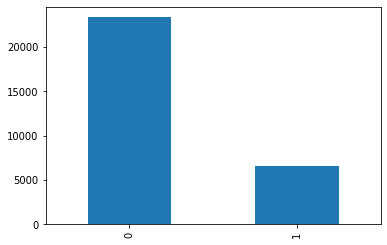

In [ ]:
#target value count
print(dataset_copy['Y'].value_counts())
dataset_copy['Y'].value_counts().plot(kind='bar')

Dataset is highly imbalanced.

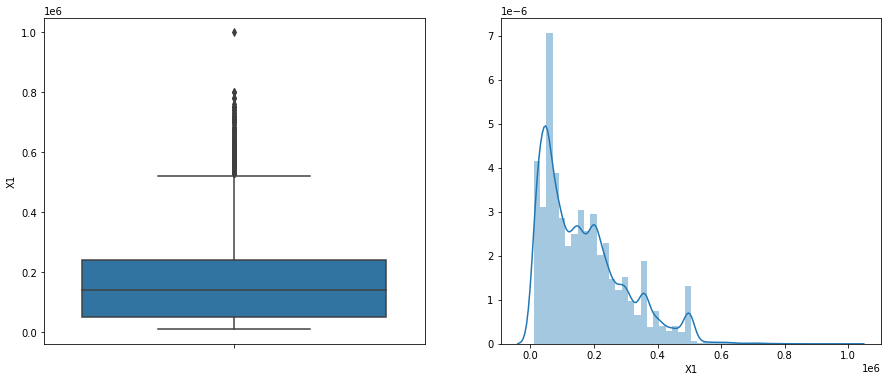

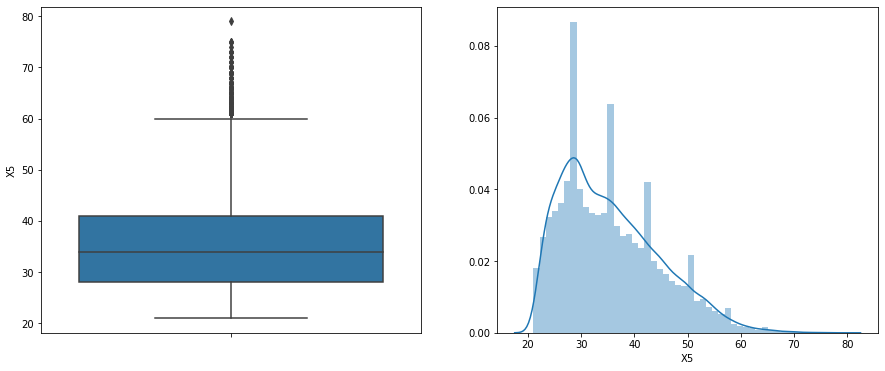

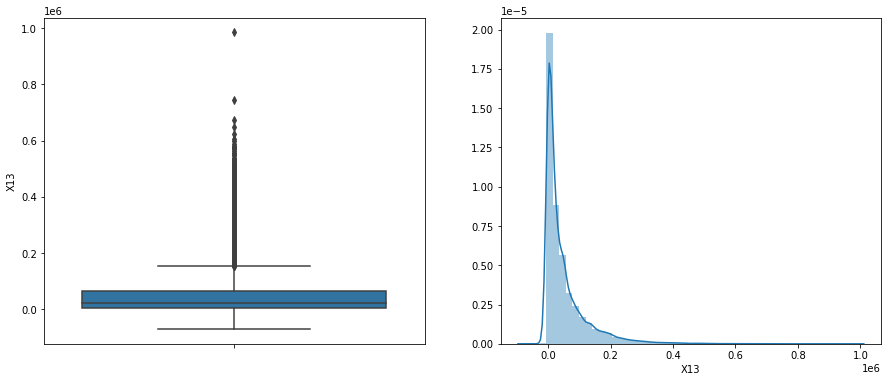

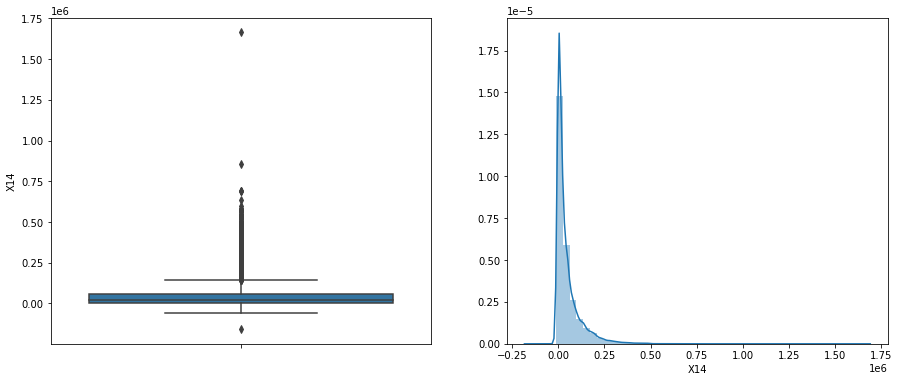

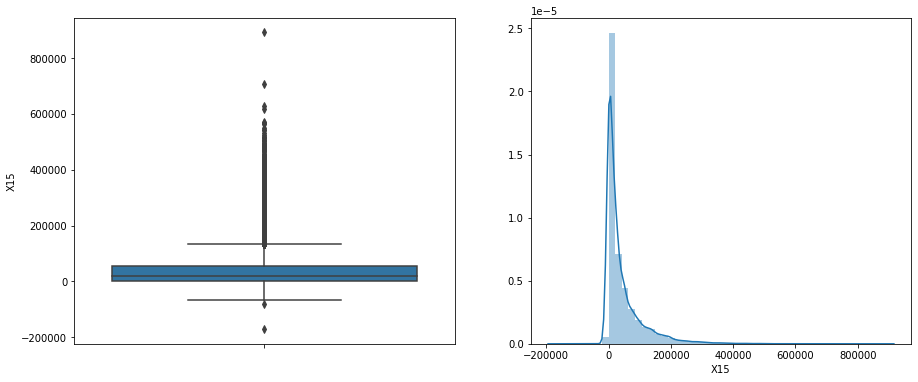

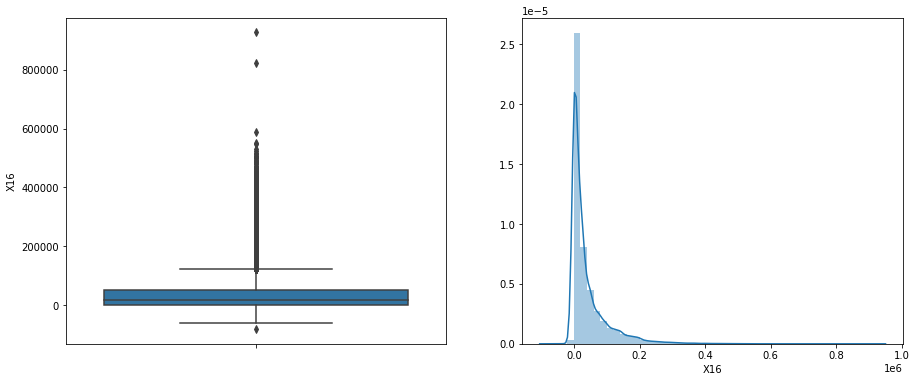

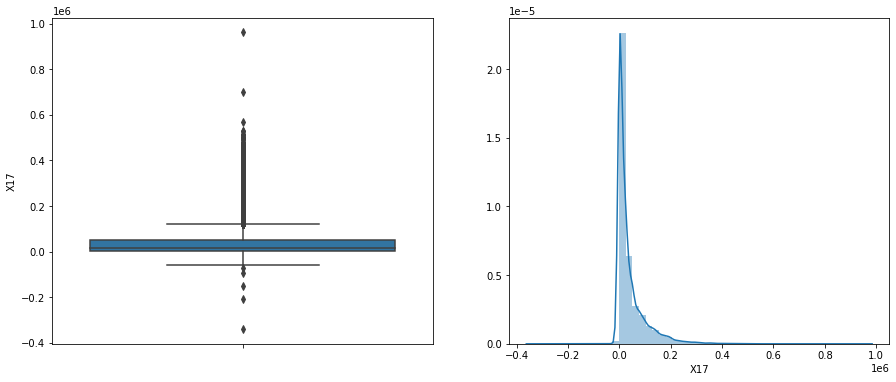

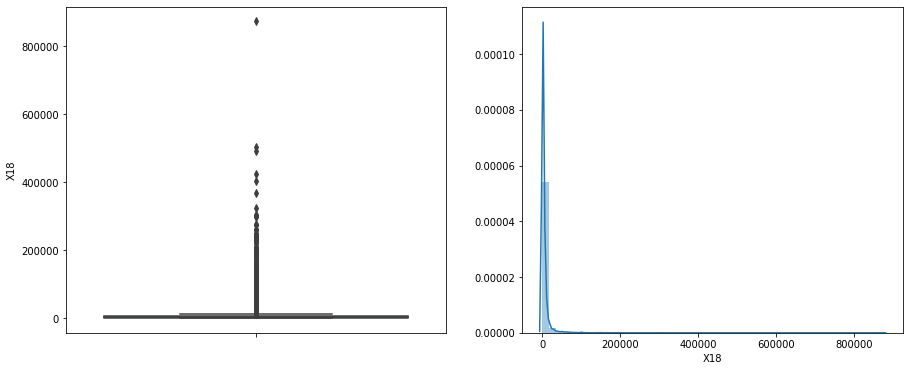

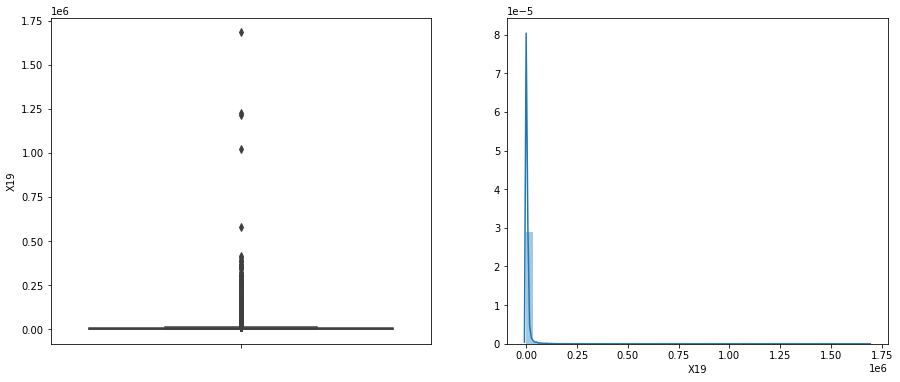

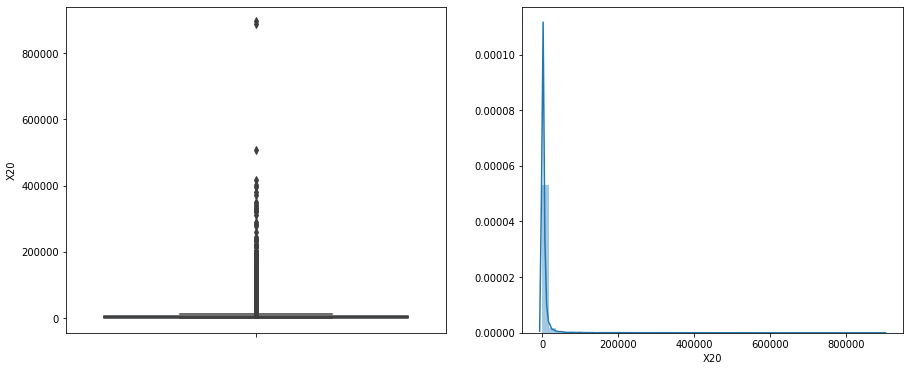

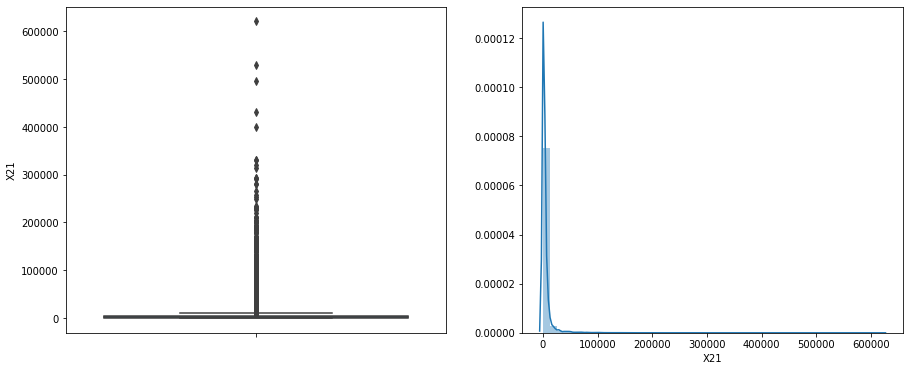

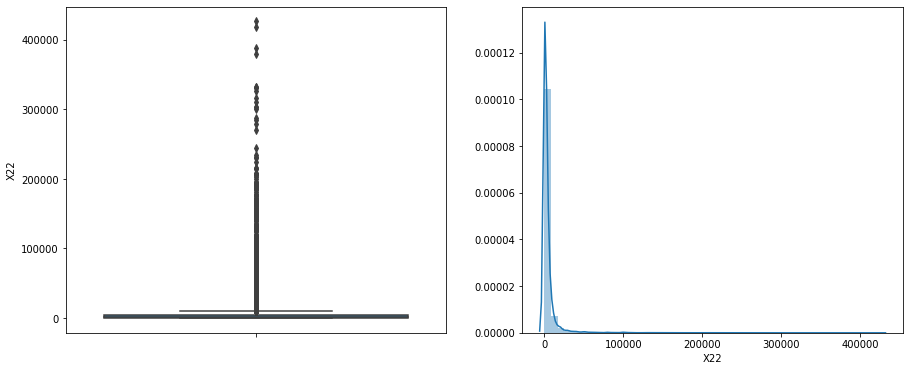

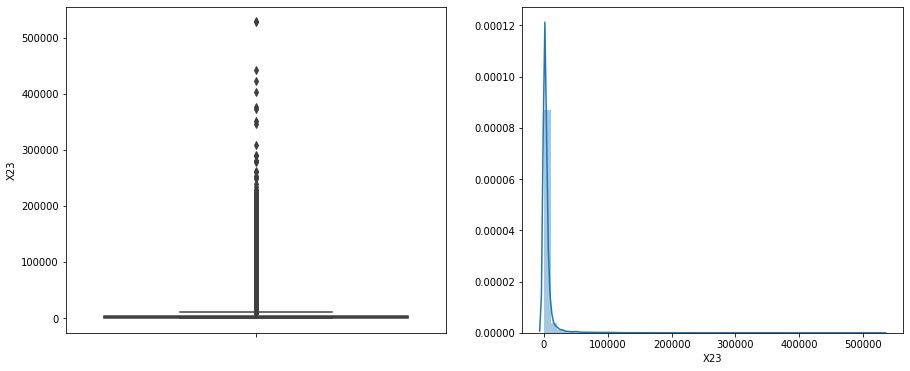

In [ ]:
for var in numerical_var:
  
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dataset_copy[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dataset_copy[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)
    plt.show()

In [ ]:
#Capping the outlier rows with Percentiles
def outlier_removal(upp_per,low_per,var):
  upper_lim = dataset_copy[var].quantile(upp_per)
  lower_lim = dataset_copy[var].quantile(low_per)
  dataset_copy.loc[(dataset_copy[var] > upper_lim),var] = upper_lim
  dataset_copy.loc[(dataset_copy[var] < lower_lim),var] = lower_lim
  


In [ ]:
def box_plott(var):
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=dataset_copy[var])
  fig.set_title('')
  fig.set_ylabel(var)
      
  plt.subplot(1, 2, 2)
  fig = sns.distplot(dataset_copy[var].dropna())
  fig.set_ylabel('')
  fig.set_xlabel(var)
  plt.show()

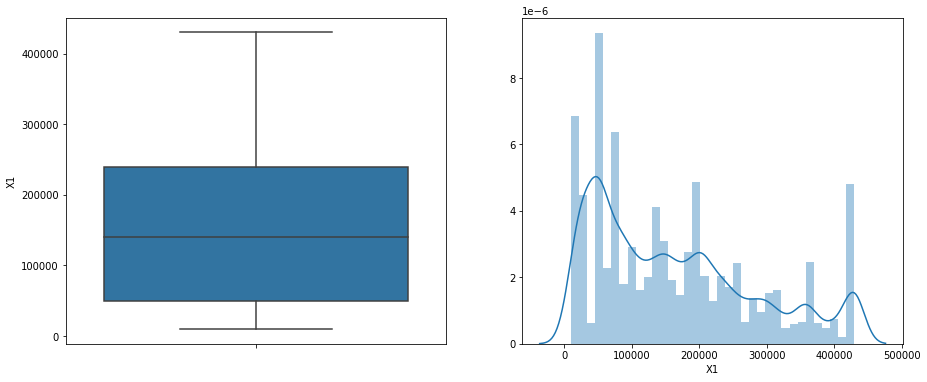

In [ ]:
# Lets remove outliers using capping for X1 Variable
outlier_removal(0.95,0,'X1')
box_plott('X1')


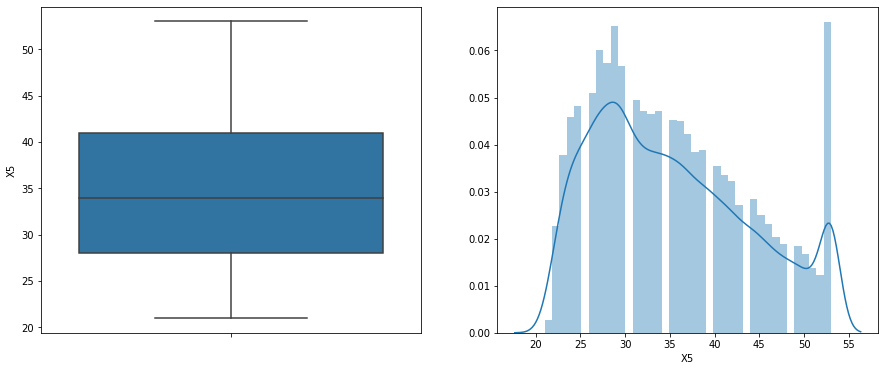

In [ ]:
# Lets remove outliers using capping for X1 Variable
outlier_removal(0.95,0,'X5')
box_plott('X5')


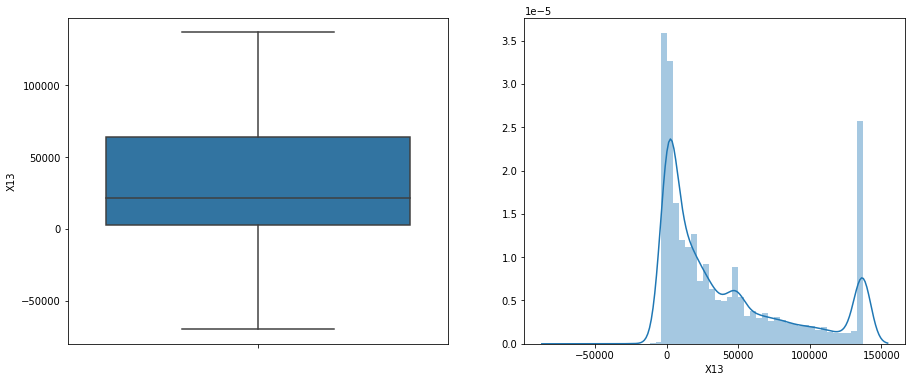

In [ ]:
# Lets remove outliers using capping for X13 Variable
outlier_removal(0.90,0,'X13')
box_plott('X13')


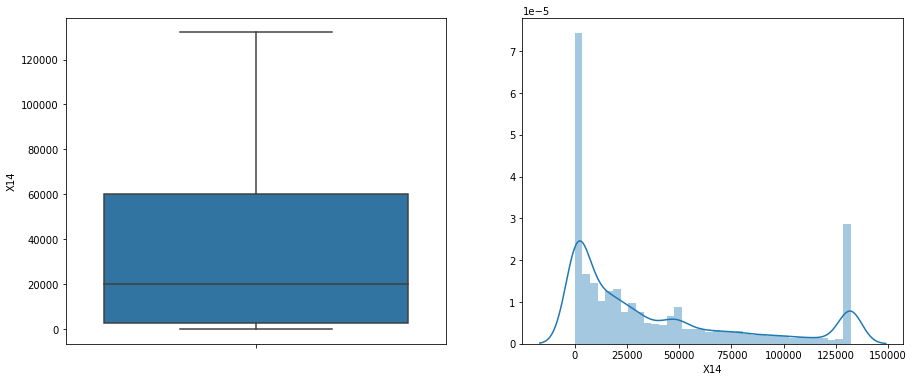

In [ ]:
# Lets remove outliers using capping for X14 Variable
outlier_removal(0.90,0.02,'X14')
box_plott('X14')


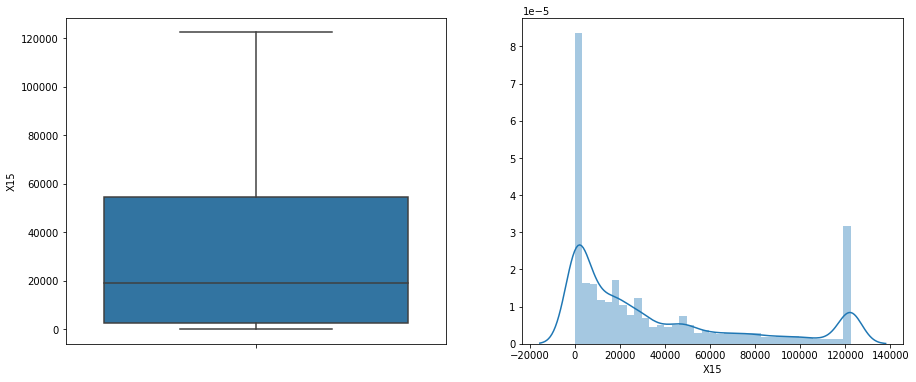

In [ ]:
# Lets remove outliers using capping for X15 Variable
outlier_removal(0.90,0.05,'X15')
box_plott('X15')


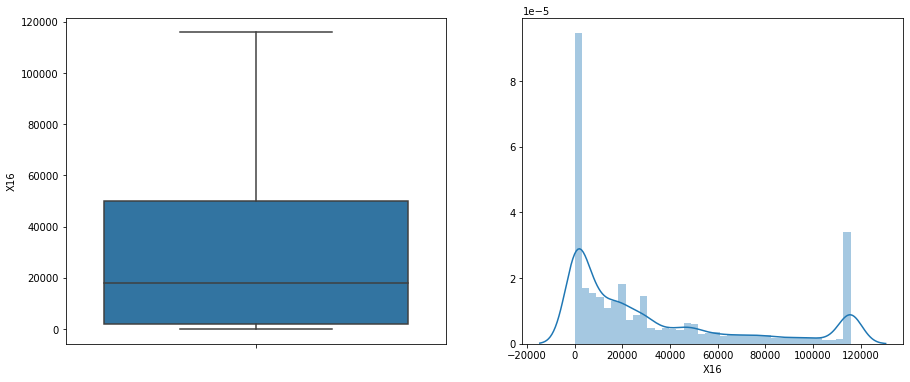

In [ ]:
# Lets remove outliers using capping for X16 Variable
outlier_removal(0.90,0.03,'X16')
box_plott('X16')


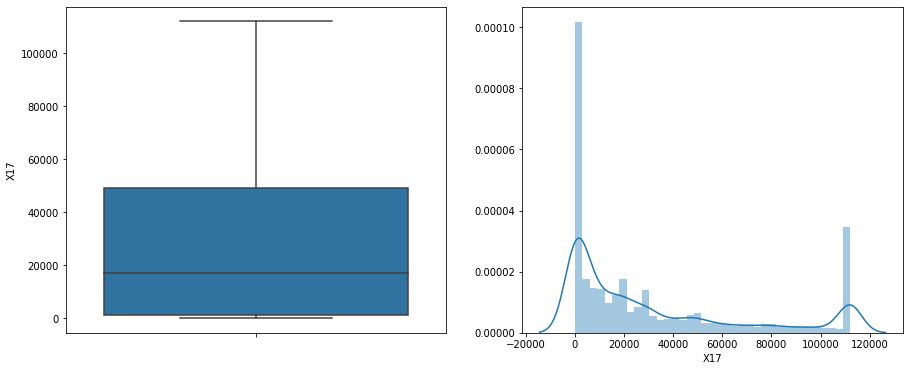

In [ ]:
# Lets remove outliers using capping for X17 Variable
outlier_removal(0.90,0.05,'X17')
box_plott('X17')


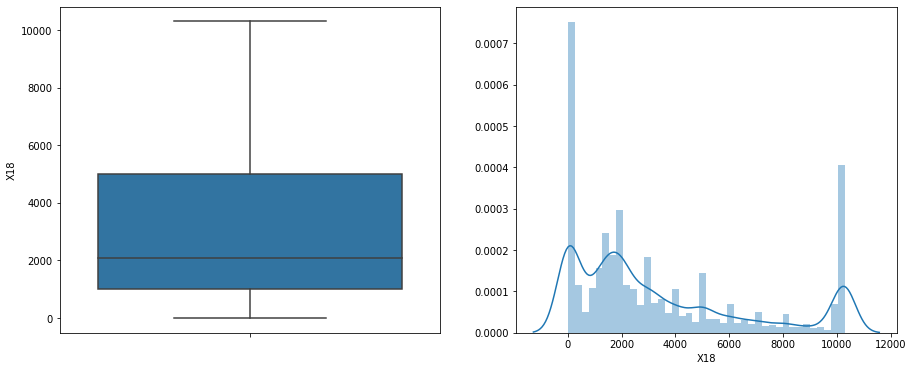

In [ ]:
# Lets remove outliers using capping for X18 Variable
outlier_removal(0.90,0,'X18')
box_plott('X18')


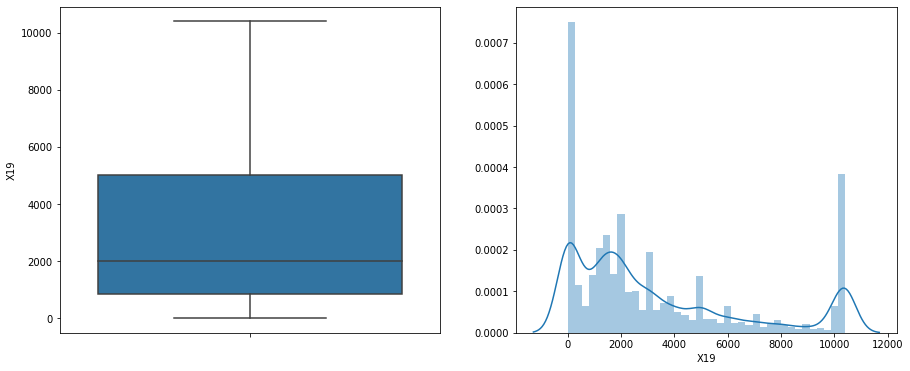

In [ ]:
# Lets remove outliers using capping for X13 Variable
outlier_removal(0.90,0,'X19')
box_plott('X19')


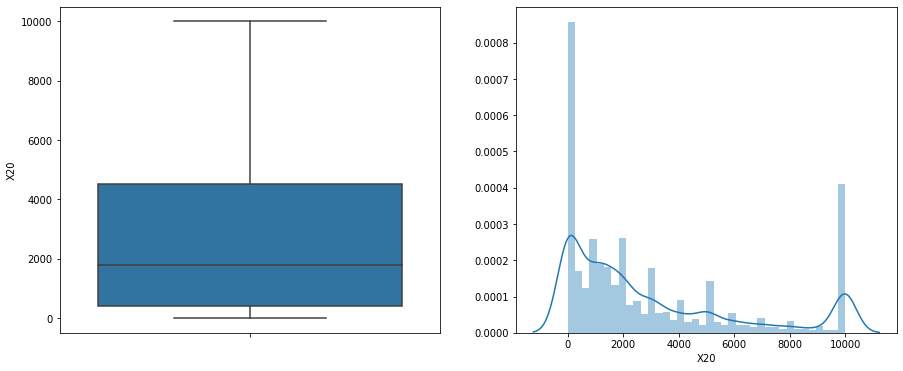

In [ ]:
# Lets remove outliers using capping for X20 Variable
outlier_removal(0.90,0,'X20')
box_plott('X20')


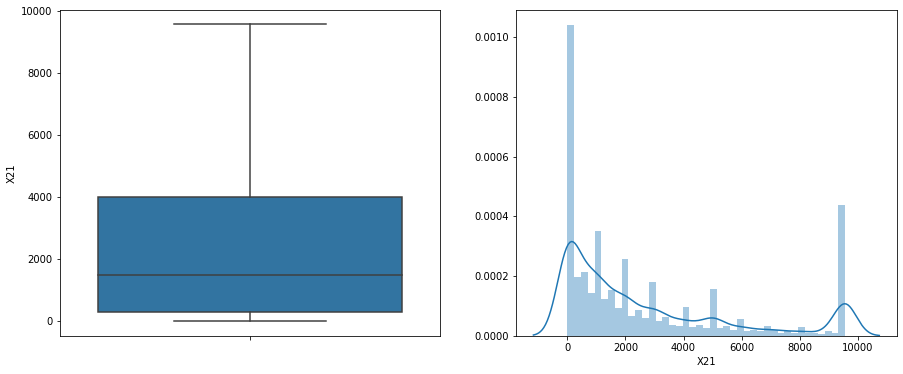

In [ ]:
# Lets remove outliers using capping for X21 Variable
outlier_removal(0.90,0,'X21')
box_plott('X21')


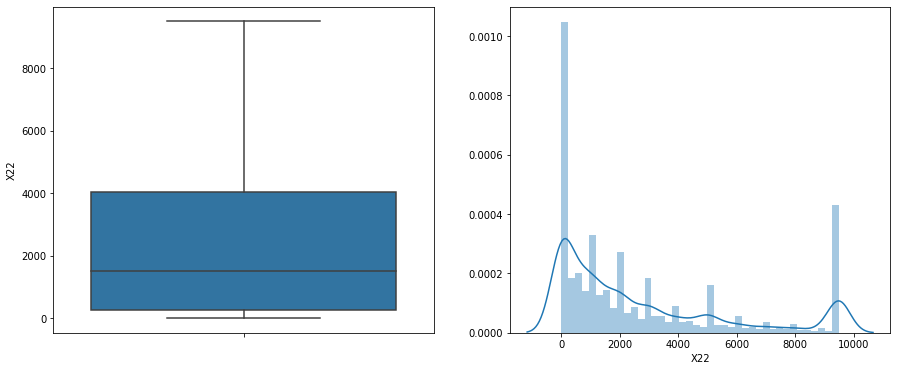

In [ ]:
# Lets remove outliers using capping for X22 Variable
outlier_removal(0.90,0,'X22')
box_plott('X22')


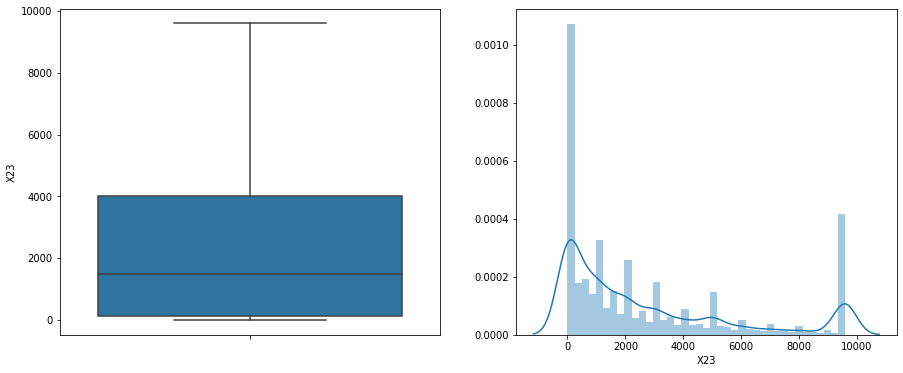

In [ ]:
# Lets remove outliers using capping for X23 Variable
outlier_removal(0.90,0,'X23')
box_plott('X23')


In [ ]:
for var in categorical_var:
    print(dataset_copy[var].value_counts() / np.float(len(dataset_copy)))
    print()

2    0.603733
1    0.396267
Name: X2, dtype: float64

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: X3, dtype: float64

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: X4, dtype: float64

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: X6, dtype: float64

 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
Name: X7, dtype: float64

 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
Name: X8, dtype: float64

 0    0.548500
-1    0.189567
-2    0.144933
 2    0.105300
 3    0.006000
 4    0.002300
 7    0.001933
 5    0.001167
 6    0.000167
 1    0.000067
 8    0.000067
Na

In [ ]:
#Since X3 contains: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). So need to treat outliers.
dataset_copy.loc[((dataset_copy.X3==0)|(dataset_copy.X3==5)|(dataset_copy.X3==6)),'X3']=4

In [ ]:
dataset_copy.X3.value_counts()

2    14030
1    10585
3     4917
4      468
Name: X3, dtype: int64

In [ ]:
#Same for Variabke X4 contains : Marital status (1 = married; 2 = single; 3 = others).So need to assign 3 for other than these no.s
dataset_copy.loc[(dataset_copy.X4==0),'X4']=3
dataset_copy.X4.value_counts()

2    15964
1    13659
3      377
Name: X4, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataset_copy.describe()

X1     X2     X3     X4       X5     X6     X7     X8     X9  \
count   30000.0  30000  30000  30000  30000.0  30000  30000  30000  30000   
unique     45.0      2      4      3     33.0     11     11     11     11   
top     50000.0      2      2      2     53.0      0      0      0      0   
freq     3365.0  18112  14030  15964   1625.0  14737  15730  15764  16455   

          X10    X11    X12       X13       X14      X15      X16      X17  \
count   30000  30000  30000   30000.0   30000.0  30000.0  30000.0  30000.0   
unique     10     10  22723   19378.0   18692.0  18211.0  17653.0  17226.0   
top         0      0      0  136905.5  132051.3      0.0      0.0      0.0   
freq    16947  16286   2008    3000.0    3000.0   3870.0   4161.0   4708.0   

            X18      X19    X20      X21      X22      X23      Y  
count   30000.0  30000.0  30000  30000.0  30000.0  30000.0  30000  
unique   5702.0   5599.0   5347   4971.0   4943.0   4921.0      2  
top         0.0      0.0      0      0.0      0.0      0.0      0  
freq     5249.0   5396.0   5968   6408.0   6703.0   7173.0  23364

In [ ]:
#rename the columns
dataset_copy.rename(columns={'X1':'LIMIT_BAL','X2':'GENDER','X3':'EDUCATION','X4':'MARRIAGE','X5':'AGE'},inplace=True)
dataset_copy.rename(columns={'X6':'PAY_SEPT','X7':'PAY_AUG','X8':'PAY_JUL','X9':'PAY_JUN','X10':'PAY_MAY','X11':'PAY_APR'},inplace=True)
dataset_copy.rename(columns={'X12':'BILL_AMT_SEPT','X13':'BILL_AMT_AUG','X14':'BILL_AMT_JUL','X15':'BILL_AMT_JUN','X16':'BILL_AMT_MAY','X17':'BILL_AMT_APR'}, inplace = True)
dataset_copy.rename(columns={'X18':'PAY_AMT_SEPT','X19':'PAY_AMT_AUG','X20':'PAY_AMT_JUL','X21':'PAY_AMT_JUN','X22':'PAY_AMT_MAY','X23':'PAY_AMT_APR','Y':'IsDefaulter'},inplace=True)

In [ ]:
dataset_copy.head()

LIMIT_BAL GENDER EDUCATION MARRIAGE   AGE PAY_SEPT PAY_AUG PAY_JUL PAY_JUN  \
1     20000      2         2        1    24        2       2      -1      -1   
2    120000      2         2        2    26       -1       2       0       0   
3     90000      2         2        2    34        0       0       0       0   
4     50000      2         2        1    37        0       0       0       0   
5     50000      1         2        1  53.0       -1       0      -1       0   

  PAY_MAY PAY_APR BILL_AMT_SEPT BILL_AMT_AUG BILL_AMT_JUL BILL_AMT_JUN  \
1      -2      -2          3913         3102          689            0   
2       0       2          2682         1725         2682         3272   
3       0       0         29239        14027        13559        14331   
4       0       0         46990        48233        49291        28314   
5       0       0          8617         5670        35835        20940   

  BILL_AMT_MAY BILL_AMT_APR PAY_AMT_SEPT PAY_AMT_AUG PAY_AMT_JUL PAY_AMT_JUN  \
1            0            0            0         689           0           0   
2         3455         3261            0        1000        1000        1000   
3        14948        15549         1518        1500        1000        1000   
4        28959        29547         2000        2019        1200        1100   
5        19146        19131         2000     10401.1       10000        9000   

  PAY_AMT_MAY PAY_AMT_APR IsDefaulter  
1           0           0           1  
2           0        2000           1  
3        1000        5000           0  
4        1069        1000           0  
5         689         679           0

##Analysis on Limit Balance

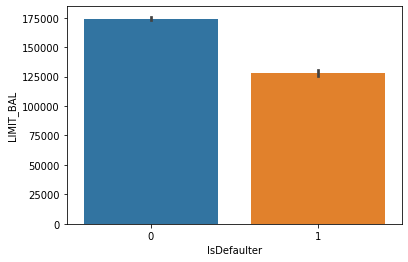

In [ ]:
#BAR PLOT
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=dataset_copy)

Thus for Defaulters the limit amount is less comparative to non defaulters

##Analysis on Gender, Education and Marriage

In [ ]:
#Lets Plot Categorical Features gender , education and marriage
cate_dataset_copy = dataset_copy[['GENDER','EDUCATION','MARRIAGE']]
cate_dataset_copy['IsDefaulter']=dataset_copy['IsDefaulter']
cate_dataset_copy.replace({'GENDER':{1:'Male',2:'Female'},'EDUCATION':{1:'graduate school', 2:'university',3:'high_school', 4:'others'},'MARRIAGE':{1:'married', 2:'single',3:'others'}},inplace=True)

<Figure size 1080x576 with 0 Axes>

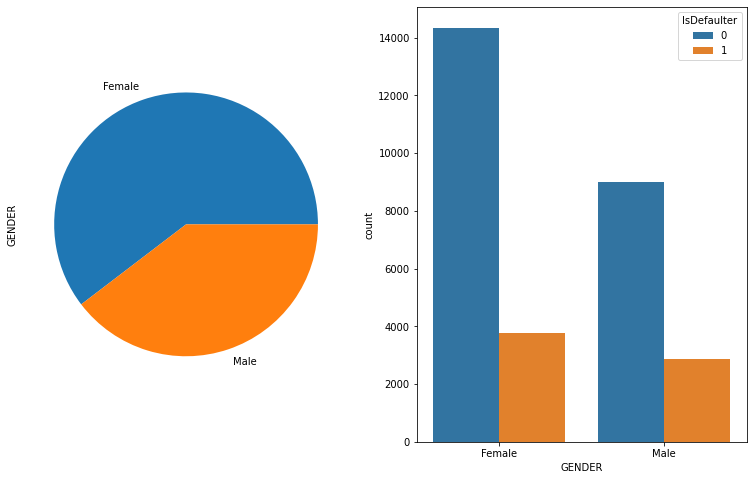

<Figure size 1080x576 with 0 Axes>

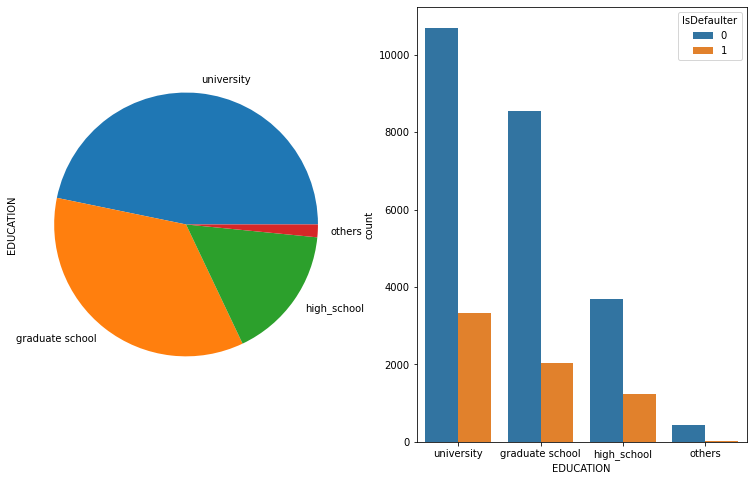

<Figure size 1080x576 with 0 Axes>

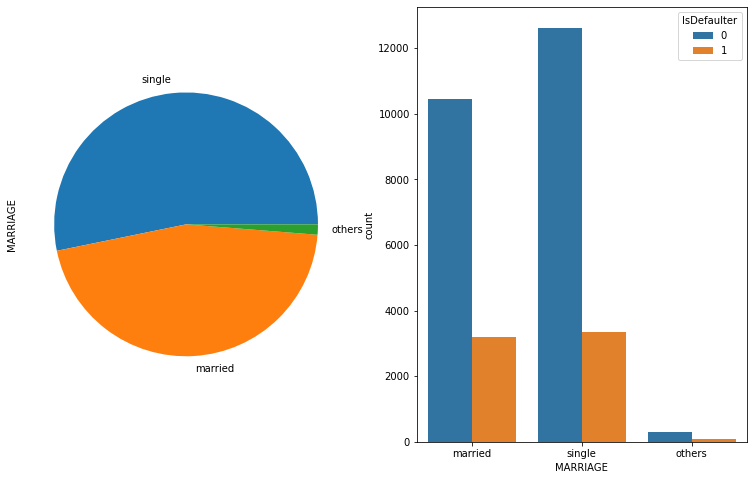

In [ ]:
for col in cate_dataset_copy.columns[:-1]:
  plt.figure(figsize=(15,8))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  cate_dataset_copy[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'IsDefaulter', data = cate_dataset_copy)

we have few observations for categorical features:

* Dataset have more females credit card holder,so number of defaulter have high proportion of females.
* Number of defaulters have a higher possibility that he is graduated from school and university ie.The order follows as            
University>graduate school>High School>Others
* Number of defaulters have a higher proportion of Singles.

##Analysis on Age

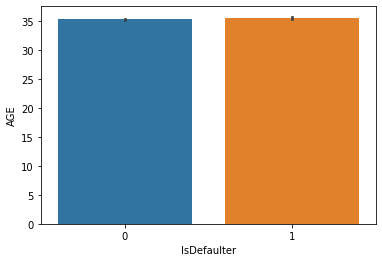

In [ ]:
#Bar Plot
sns.barplot(x='IsDefaulter', y='AGE', data=dataset_copy)

##Analysis on Payment History

In [ ]:
def plot_cate_feature(feature,feature_list,df):
    
    if (len(feature_list)==1):
        fig, axes = plt.subplots(ncols=1,nrows=1,figsize=(9,6))
    else:
        fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(20,15))
        
    fig.suptitle("Distributions for " + feature)

    for i in range (0,len(feature_list)):
        f = feature_list[i]
        if (i%2==0):
            k = 0
            j = int(i/2)
        else:
            k = 1
            j = int(i/2)
        if (len(feature_list)!=1):
            sns.countplot(x = f,hue = 'IsDefaulter',data=dataset_copy,ax = axes[j][k])
        else:
          sns.countplot(x = f,hue = 'IsDefaulter',data=dataset_copy)
            
    fig.legend()
    
            

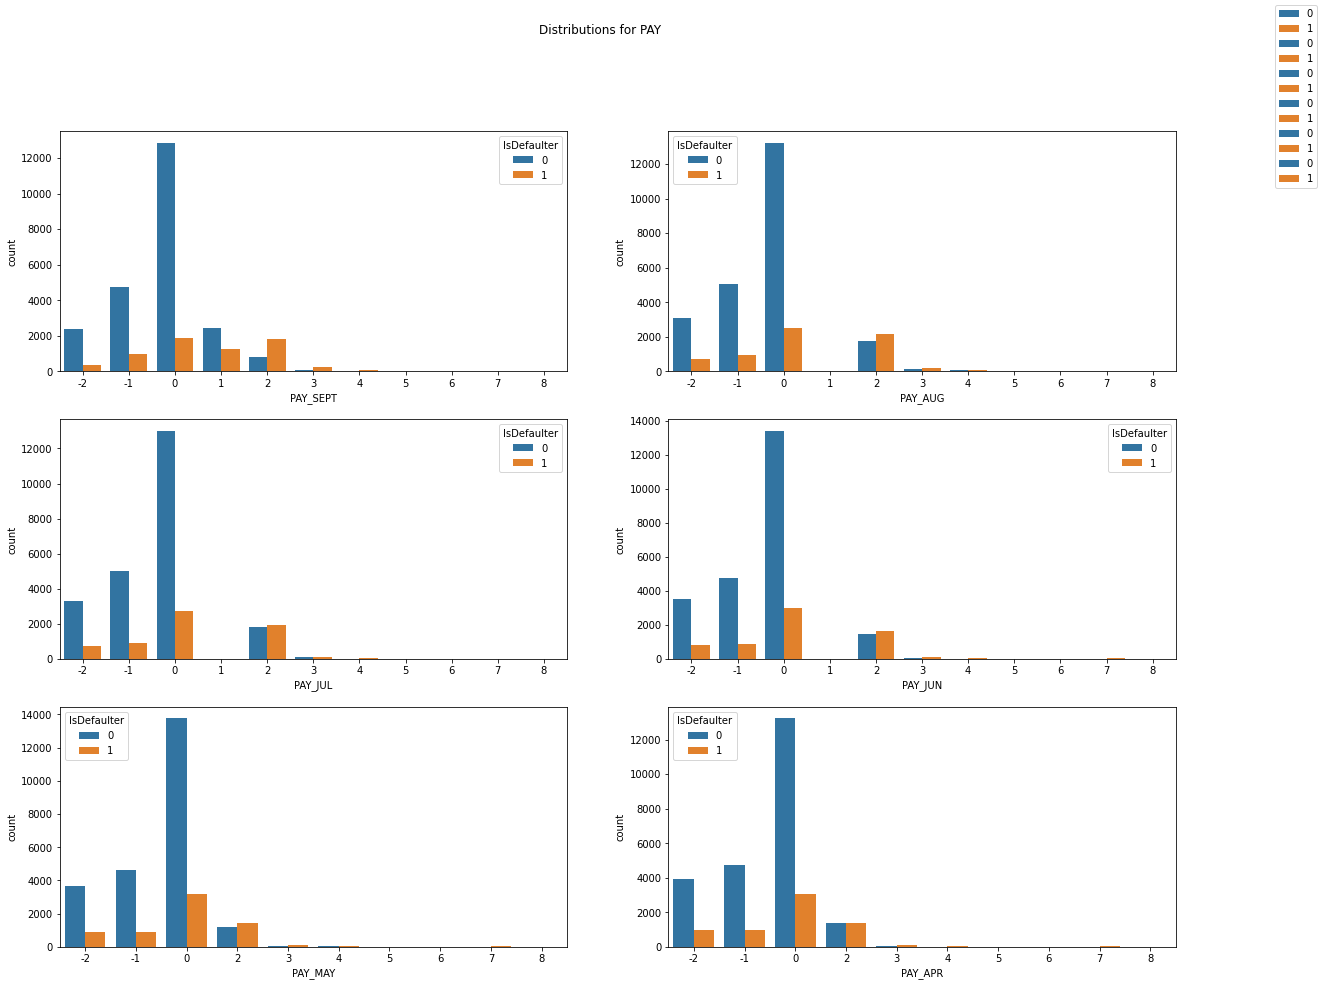

In [ ]:
feature_pay = ['PAY_SEPT', 'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
plot_cate_feature('PAY',feature_pay,dataset_copy)


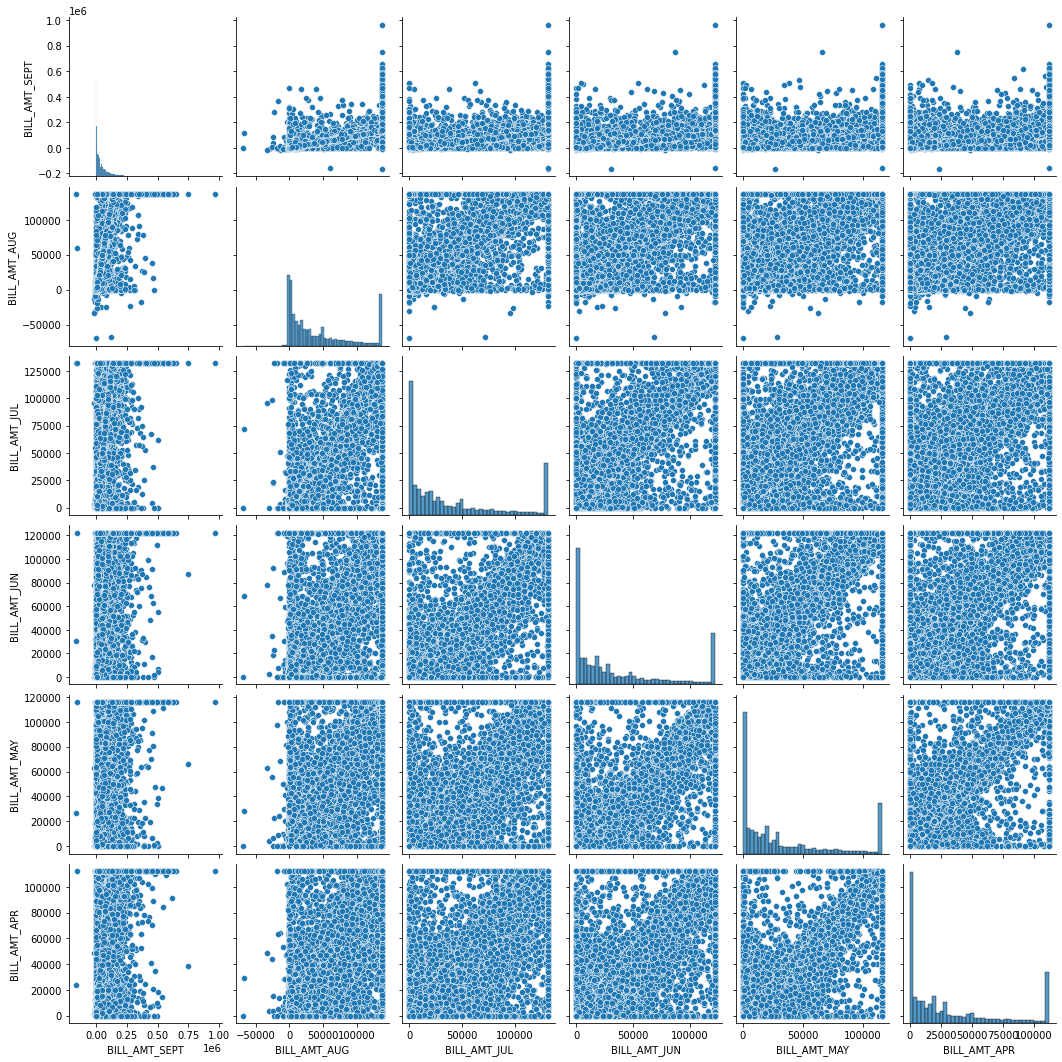

In [ ]:
feature_bill = dataset_copy[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]
sns.pairplot(feature_bill)

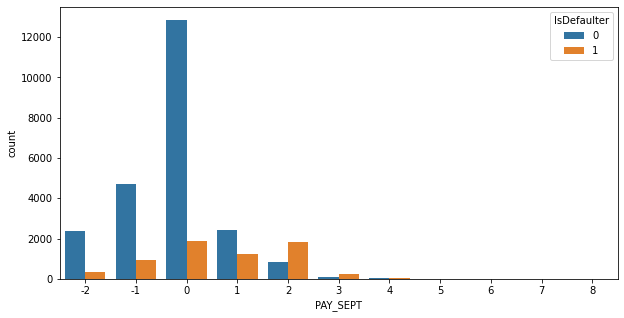

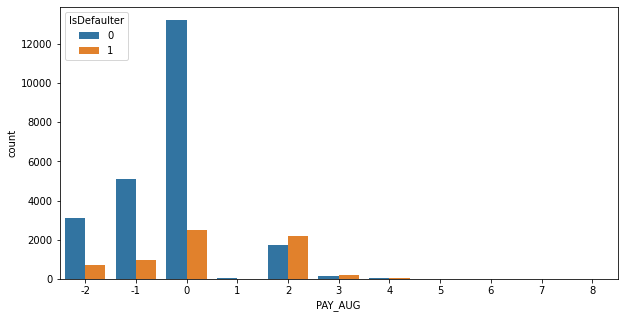

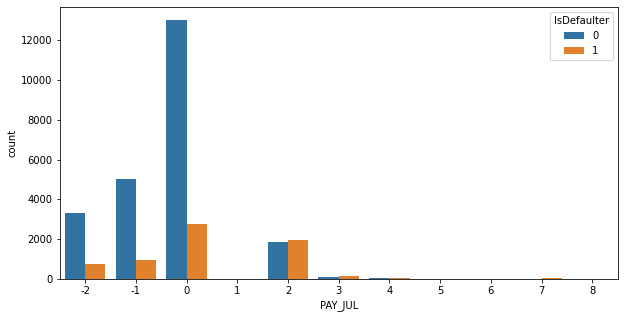

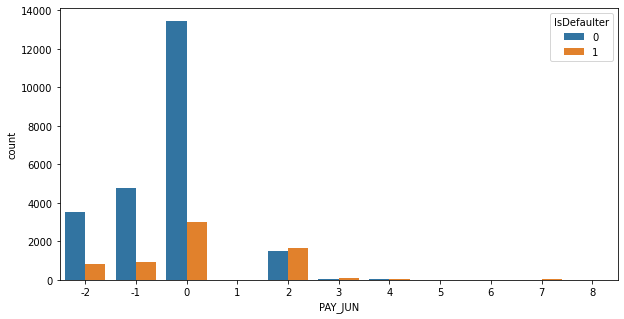

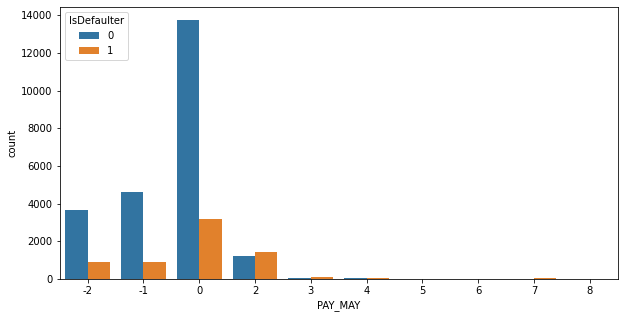

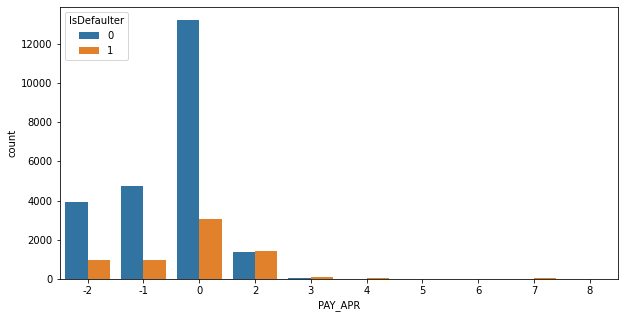

In [ ]:
#plot for the pay month to deafulter
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = dataset_copy)

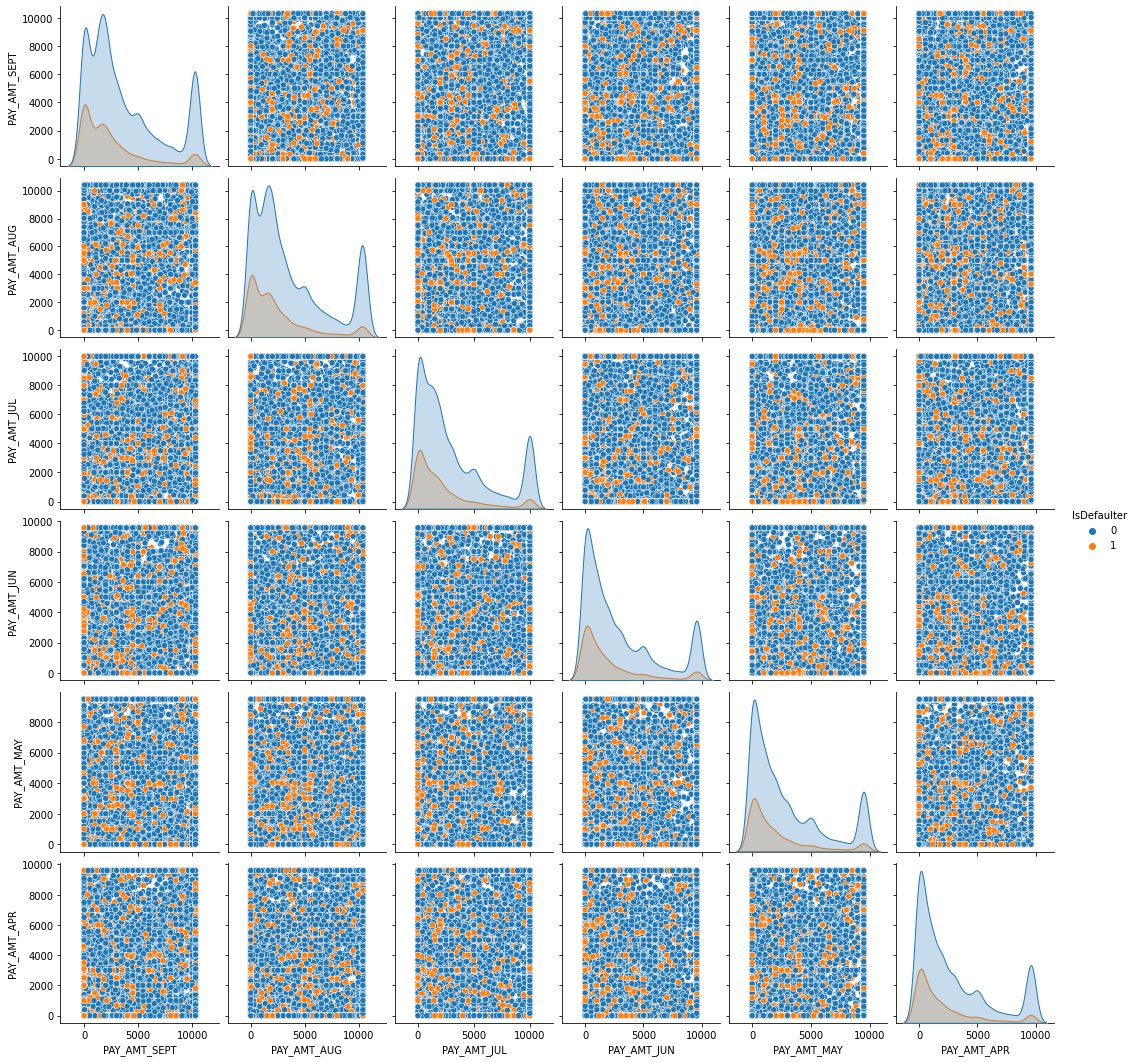

In [ ]:
#preapre dataset for pair plot
pay_amnt_df = dataset_copy[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]
#pair plot
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

##Correlation

In [ ]:
dataset_copy_corr = dataset_copy.astype(int)

In [ ]:
#Correlation
np.round(dataset_copy_corr.corr()['IsDefaulter'],3)

LIMIT_BAL       -0.157
GENDER          -0.040
EDUCATION        0.034
MARRIAGE        -0.028
AGE              0.012
PAY_SEPT         0.325
PAY_AUG          0.264
PAY_JUL          0.235
PAY_JUN          0.217
PAY_MAY          0.204
PAY_APR          0.187
BILL_AMT_SEPT   -0.020
BILL_AMT_AUG    -0.023
BILL_AMT_JUL    -0.021
BILL_AMT_JUN    -0.016
BILL_AMT_MAY    -0.013
BILL_AMT_APR    -0.008
PAY_AMT_SEPT    -0.145
PAY_AMT_AUG     -0.140
PAY_AMT_JUL     -0.126
PAY_AMT_JUN     -0.114
PAY_AMT_MAY     -0.108
PAY_AMT_APR     -0.115
IsDefaulter      1.000
Name: IsDefaulter, dtype: float64

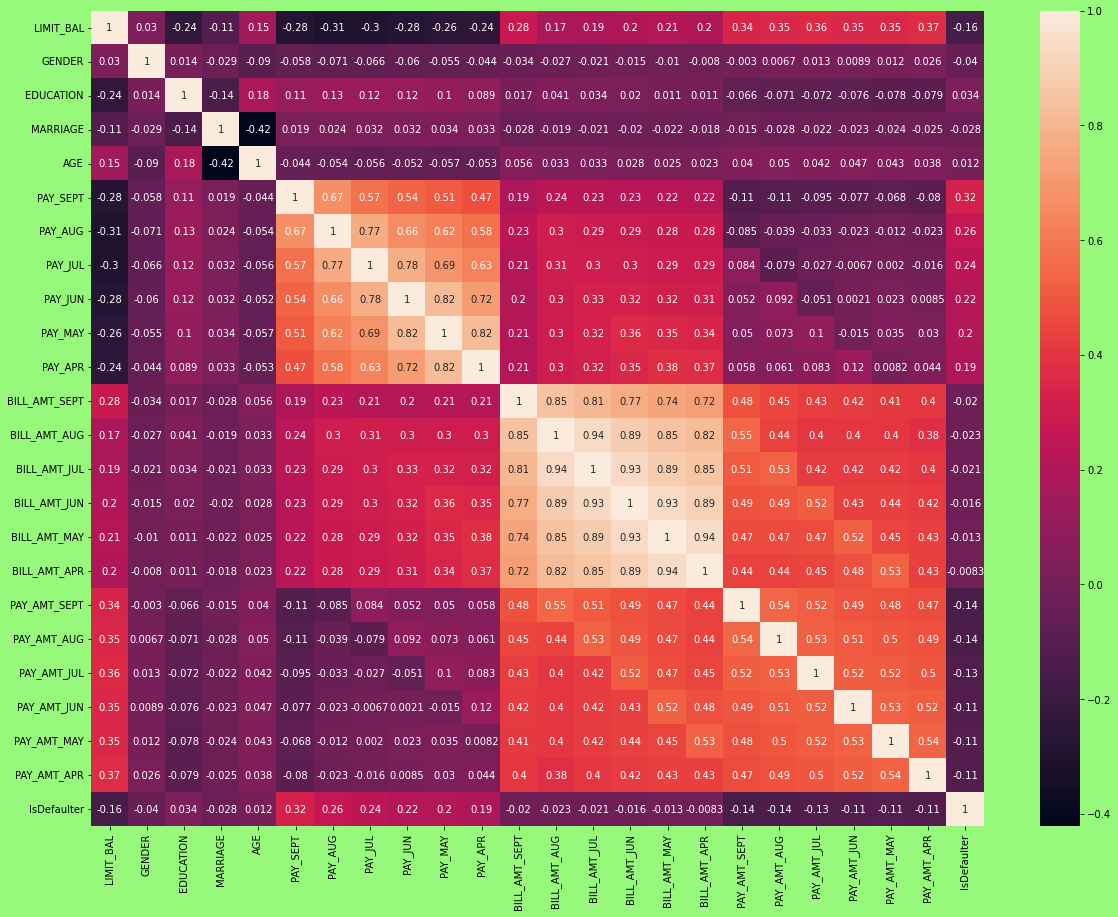

In [ ]:
#correlation plot for multicollinearity relation
plt.figure(figsize=(20,15),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(dataset_copy_corr.corr(),annot = True)

Thus From Above correlation we can deduce that payment History is highly correlated with credit Default , Thus it is most impotant feature for deciding the Default prediction for a customer

#**One Hot Encoding**

In [ ]:
#assigning the value for diffrent categories
dataset_copy.replace({'GENDER': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
dataset_copy.head()

LIMIT_BAL  GENDER   EDUCATION MARRIAGE   AGE PAY_SEPT PAY_AUG PAY_JUL  \
1     20000  FEMALE  university  married    24        2       2      -1   
2    120000  FEMALE  university   single    26       -1       2       0   
3     90000  FEMALE  university   single    34        0       0       0   
4     50000  FEMALE  university  married    37        0       0       0   
5     50000    MALE  university  married  53.0       -1       0      -1   

  PAY_JUN PAY_MAY PAY_APR BILL_AMT_SEPT BILL_AMT_AUG BILL_AMT_JUL  \
1      -1      -2      -2          3913         3102          689   
2       0       0       2          2682         1725         2682   
3       0       0       0         29239        14027        13559   
4       0       0       0         46990        48233        49291   
5       0       0       0          8617         5670        35835   

  BILL_AMT_JUN BILL_AMT_MAY BILL_AMT_APR PAY_AMT_SEPT PAY_AMT_AUG PAY_AMT_JUL  \
1            0            0            0            0         689           0   
2         3272         3455         3261            0        1000        1000   
3        14331        14948        15549         1518        1500        1000   
4        28314        28959        29547         2000        2019        1200   
5        20940        19146        19131         2000     10401.1       10000   

  PAY_AMT_JUN PAY_AMT_MAY PAY_AMT_APR IsDefaulter  
1           0           0           0           1  
2        1000           0        2000           1  
3        1000        1000        5000           0  
4        1100        1069        1000           0  
5        9000         689         679           0

In [ ]:
#creating dummy variables
dataset_copy = pd.get_dummies(dataset_copy, columns = ['EDUCATION', 'MARRIAGE'])

In [ ]:
dataset_copy.shape

(30000, 29)

In [ ]:
#creating dummy variables by droping first variable
dataset_copy = pd.get_dummies(dataset_copy, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'])

In [ ]:
# LABEL ENCODING FOR Gender
encoders_nums = {"GENDER":{"FEMALE": 0, "MALE": 1}}
dataset_copy = dataset_copy.replace(encoders_nums)

In [ ]:
dataset_copy.head()

LIMIT_BAL  GENDER   AGE BILL_AMT_SEPT BILL_AMT_AUG BILL_AMT_JUL  \
1     20000       0    24          3913         3102          689   
2    120000       0    26          2682         1725         2682   
3     90000       0    34         29239        14027        13559   
4     50000       0    37         46990        48233        49291   
5     50000       1  53.0          8617         5670        35835   

  BILL_AMT_JUN BILL_AMT_MAY BILL_AMT_APR PAY_AMT_SEPT PAY_AMT_AUG PAY_AMT_JUL  \
1            0            0            0            0         689           0   
2         3272         3455         3261            0        1000        1000   
3        14331        14948        15549         1518        1500        1000   
4        28314        28959        29547         2000        2019        1200   
5        20940        19146        19131         2000     10401.1       10000   

  PAY_AMT_JUN PAY_AMT_MAY PAY_AMT_APR IsDefaulter  EDUCATION_graduate school  \
1           0           0           0           1                          0   
2        1000           0        2000           1                          0   
3        1000        1000        5000           0                          0   
4        1100        1069        1000           0                          0   
5        9000         689         679           0                          0   

   EDUCATION_high school  EDUCATION_others  EDUCATION_university  \
1                      0                 0                     1   
2                      0                 0                     1   
3                      0                 0                     1   
4                      0                 0                     1   
5                      0                 0                     1   

   MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  PAY_SEPT_-2  \
1                 1                0                0            0   
2                 0                0                1            0   
3                 0                0                1            0   
4                 1                0                0            0   
5                 1                0                0            0   

   PAY_SEPT_-1  PAY_SEPT_0  PAY_SEPT_1  PAY_SEPT_2  PAY_SEPT_3  PAY_SEPT_4  \
1            0           0           0           1           0           0   
2            1           0           0           0           0           0   
3            0           1           0           0           0           0   
4            0           1           0           0           0           0   
5            1           0           0           0           0           0   

   PAY_SEPT_5  PAY_SEPT_6  PAY_SEPT_7  PAY_SEPT_8  PAY_AUG_-2  PAY_AUG_-1  \
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   

   PAY_AUG_0  PAY_AUG_1  PAY_AUG_2  PAY_AUG_3  PAY_AUG_4  PAY_AUG_5  \
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          1          0          0          0          0          0   
4          1          0          0          0          0          0   
5          1          0          0          0          0          0   

   PAY_AUG_6  PAY_AUG_7  PAY_AUG_8  PAY_JUL_-2  PAY_JUL_-1  PAY_JUL_0  \
1          0          0          0           0           1          0   
2          0          0          0           0           0          1   
3          0          0          0           0           0          1   
4          0          0          0           0           0          1   
5          0          0          0           0           1       

In [ ]:
dataset_copy.shape

(30000, 87)

#**Handling Class Imbalance**

##**SMOTE** - Synthetic Minority Oversampling Technique

In [ ]:
dataset_copy=dataset_copy.astype(int)

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(dataset_copy.drop('IsDefaulter',axis=1), dataset_copy['IsDefaulter'])

print('Original unbalanced dataset shape', len(dataset_copy))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [ ]:
x_smote.shape

(46728, 86)

In [ ]:
#creating new dataframe from balanced dataset after SMOTE
balanced_dataset = x_smote.copy()

In [ ]:
#adding target variable to new created dataframe
balanced_dataset['IsDefaulter'] = y_smote

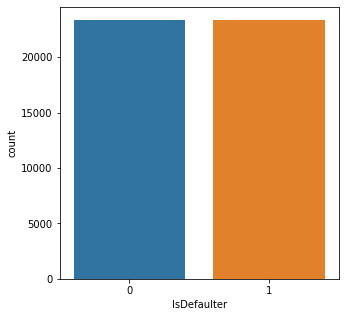

In [ ]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot('IsDefaulter', data = balanced_dataset)

In [ ]:
balanced_dataset.shape

(46728, 87)

Data is ready to feed as input in our models

#**Data Transformation**

In [ ]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x_smote)

#**Train Test Splitting**

In [ ]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, balanced_dataset['IsDefaulter'], test_size=0.2,random_state=42, stratify=balanced_dataset['IsDefaulter'])

In [ ]:
print(X_train.shape)
print(y_train.shape)

(37382, 86)
(37382,)


#**Model Implementation**

##Basic Functions


In [ ]:
#getting all scores
def evaluation_metrics(y_train_pred,y_train,y_pred,y_test):
  
  train_accuracy = round(accuracy_score(y_train_pred,y_train), 3)
  accuracy = round(accuracy_score(y_pred,y_test), 3)
  precision = round(precision_score(y_pred,y_test), 3)
  recall = round(recall_score(y_pred,y_test), 3)
  f1 = round(f1_score(y_pred,y_test), 3)
  roc = round(roc_auc_score(y_pred,y_test), 3)

  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", accuracy)
  print("The precision on test data is ", precision)
  print("The recall on test data is ", recall)
  print("The f1 on test data is ", f1)
  print("The roc_score on test data is ", roc)

In [ ]:
# Get the confusion matrix
def cf_matrix(y_test,y_pred,algo_name):

  labels = ['Not Defaulter', 'Defaulter']
  cm = confusion_matrix(y_test, y_pred )
  print(cm)

  #plot confusion matrix
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax)

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title(f'Confusion Matrix - {algo_name}')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

##Logistic Regression Model

###Baseline

In [ ]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [ ]:
#fitting data into Logistic Regression
logis = LogisticRegression()
logis.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#predicting train and test y
y_train_pred_logi=logis.predict(X_train)
y_pred_logi = logis.predict(X_test)

In [ ]:
#getting all scores for Logistic Regression
evaluation_metrics(y_train_pred_logi,y_train,y_pred_logi,y_test)

The accuracy on train data is  0.875
The accuracy on test data is  0.876
The precision on test data is  0.806
The recall on test data is  0.938
The f1 on test data is  0.867
The roc_score on test data is  0.884


[[4425  248]
 [ 908 3765]]


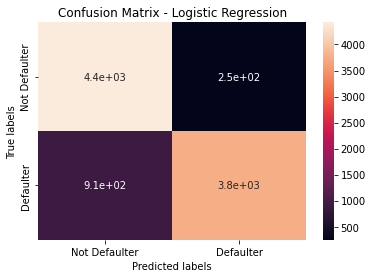

In [ ]:
# Get the confusion matrix
cf_matrix(y_test,y_pred_logi,'Logistic Regression')

###Cross Validation & Hyperparameter Tuning for Logistic Regression

In [ ]:
#importing library
from sklearn.model_selection import GridSearchCV

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [ 0.001, 0.1, 0.5, 1, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,'max_iter' : [100, 1000,2500],'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,param_grid = param_dict,cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 1.5, 5, 10],
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [ ]:
logi_grid.best_estimator_

LogisticRegression(C=10, max_iter=1000)

In [ ]:
logi_grid.best_params_

{'C': 10, 'max_iter': 1000, 'penalty': 'l2'}

In [ ]:
logi_optimal_model = logi_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

In [ ]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
evaluation_metrics(y_train_pred_logi_grid,y_train,y_pred_logi_grid,y_test)

The accuracy on train data is  0.875
The accuracy on test data is  0.876
The precision on test data is  0.806
The recall on test data is  0.938
The f1 on test data is  0.867
The roc_score on test data is  0.884


In [ ]:
# Get the confusion matrices for train and test
print("confusion_matrix for train\n",confusion_matrix(y_train,y_train_pred_logi_grid))
print("confusion_matrix for test\n",confusion_matrix(y_test,y_pred_logi_grid))

confusion_matrix for train
 [[17801   890]
 [ 3780 14911]]
confusion_matrix for test
 [[4426  247]
 [ 908 3765]]


##Decision Tree Classification

###Baseline

In [ ]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [ ]:
#getting all scores for Decision Tree Classifier
evaluation_metrics(y_train_pred_dtc,y_train,y_pred_dtc,y_test)

The accuracy on train data is  0.999
The accuracy on test data is  0.811
The precision on test data is  0.838
The recall on test data is  0.795
The f1 on test data is  0.816
The roc_score on test data is  0.811


[[3661 1012]
 [ 759 3914]]


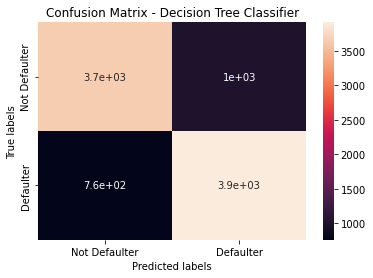

In [ ]:
# Get the confusion matrix for decision tree classifier
cf_matrix(y_test,y_pred_dtc,'Decision Tree Classifier')

###Cross Validation & Hyperparameter Tuning for Decision Tree Classifier

In [ ]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,'min_samples_split':min_samples_split,'min_samples_leaf': min_samples_leaf}

In [ ]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,param_grid = param_dict,cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [ ]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=30, min_samples_leaf=60,
                       min_samples_split=0.001)

In [ ]:
dtc_grid.best_params_

{'max_depth': 30, 'min_samples_leaf': 60, 'min_samples_split': 0.001}

In [ ]:
dtc_optimal_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)

In [ ]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
evaluation_metrics(y_train_pred_dtc_grid,y_train,y_pred_dtc_grid,y_test)

The accuracy on train data is  0.854
The accuracy on test data is  0.841
The precision on test data is  0.783
The recall on test data is  0.885
The f1 on test data is  0.831
The roc_score on test data is  0.845


In [ ]:
# Get the confusion matrices for train and test
print("confusion_matrix for train:\n",confusion_matrix(y_train,y_train_pred_dtc_grid))
print("\nconfusion_matrix for test:\n",confusion_matrix(y_test,y_pred_dtc_grid))

confusion_matrix for train:
 [[17032  1659]
 [ 3812 14879]]

confusion_matrix for test:
 [[4199  474]
 [1014 3659]]


##Random Forest Classification

###Baseline

In [ ]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [ ]:
#getting all scores for Random Forest Classifier
evaluation_metrics(y_train_pred_rfc,y_train,y_pred_rfc,y_test)

The accuracy on train data is  0.999
The accuracy on test data is  0.879
The precision on test data is  0.841
The recall on test data is  0.911
The f1 on test data is  0.874
The roc_score on test data is  0.881


[[4288  385]
 [ 744 3929]]


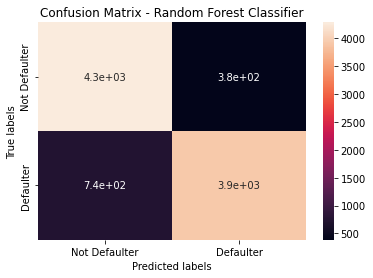

In [ ]:
# Get the confusion matrix for Random Forest Classifier
cf_matrix(y_test,y_pred_rfc,'Random Forest Classifier')

###Cross Validation & Hyper parameter Tuning for Random Forest Classifier

In [ ]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   4.5s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [ ]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [ ]:
rfc_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

In [ ]:
evaluation_metrics(y_train_pred_rfc_grid,y_train,y_pred_rfc_grid,y_test)

The accuracy on train data is  0.856
The accuracy on test data is  0.848
The precision on test data is  0.802
The recall on test data is  0.883
The f1 on test data is  0.84
The roc_score on test data is  0.851


In [ ]:
# Get the confusion matrices for train and test
print("confusion_matrix for train:\n",confusion_matrix(y_train,y_train_pred_rfc_grid))
print("\nconfusion_matrix for test:\n",confusion_matrix(y_test,y_pred_rfc_grid))

confusion_matrix for train:
 [[16883  1808]
 [ 3577 15114]]

confusion_matrix for test:
 [[4175  498]
 [ 925 3748]]


##Gradient Boosting

###Baseline

In [ ]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [ ]:
#getting all scores for Gradient Boosting Classifier
evaluation_metrics(y_train_pred_gbc,y_train,y_pred_gbc,y_test)

The accuracy on train data is  0.87
The accuracy on test data is  0.869
The precision on test data is  0.803
The recall on test data is  0.926
The f1 on test data is  0.86
The roc_score on test data is  0.876


[[4371  302]
 [ 921 3752]]


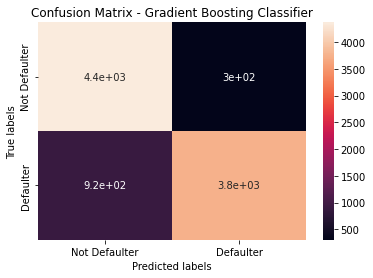

In [ ]:
# Get the confusion matrix for Gradient Boosting Classifier
cf_matrix(y_test,y_pred_gbc,'Gradient Boosting Classifier')

###Cross Validation & Hyper parameter Tuning for Gradient Boosting Classifier

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the Gradient Boosting Classifier.
# Since for Gridsearch CV it will take 648 total fits thus will take more computational time so implementing Randomized Search CV.

gbc = GradientBoostingClassifier(random_state=42)


# Randomized search
from sklearn.model_selection import RandomizedSearchCV
gbc_grid = RandomizedSearchCV(estimator=gbc,param_distributions = param_dict,cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.5, max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  26.2s
[CV] END learning_rate=0.5, max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=100; total time=  22.6s
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time= 1.3min
[CV] END learning_rate=0.5, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time= 1.3min
[CV] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=  36.6s
[CV] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=150; total time=  35.8s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time=  34.8s
[CV] END learning_rate=0.1, max_depth=10, min_samples_leaf=50, min_samples_s

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [ ]:
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=30,
                           min_samples_leaf=40, min_samples_split=150,
                           random_state=42)

In [ ]:
gbc_grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 30,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 100}

In [ ]:
gbc_optimal_model = gbc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

In [ ]:
evaluation_metrics(y_train_pred_gbc_grid,y_train,y_pred_gbc_grid,y_test)

The accuracy on train data is  0.941
The accuracy on test data is  0.88
The precision on test data is  0.831
The recall on test data is  0.921
The f1 on test data is  0.874
The roc_score on test data is  0.884


In [ ]:
# Get the confusion matrices for train and test
print("confusion_matrix for train:\n",confusion_matrix(y_train,y_train_pred_gbc_grid))
print("\nconfusion_matrix for test:\n",confusion_matrix(y_test,y_pred_gbc_grid))

confusion_matrix for train:
 [[18310   381]
 [ 1824 16867]]

confusion_matrix for test:
 [[4340  333]
 [ 790 3883]]


##XG Boosting

###Baseline

In [ ]:
# importing XG Boosting Classifier
from xgboost import XGBClassifier

In [ ]:
# Fitting data into XG Boosting Classifier
#fitting data into Gradient Boosting Classifier
xgbc = XGBClassifier(random_state=42)
xgbc.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [ ]:
#class prediction of y
y_pred_xgbc=xgbc.predict(X_test)
y_train_pred_xgbc=xgbc.predict(X_train)

In [ ]:
#getting all scores for XG Boosting Classifier
evaluation_metrics(y_train_pred_xgbc,y_train,y_pred_xgbc,y_test)

The accuracy on train data is  0.87
The accuracy on test data is  0.869
The precision on test data is  0.805
The recall on test data is  0.924
The f1 on test data is  0.86
The roc_score on test data is  0.876


[[4362  311]
 [ 910 3763]]


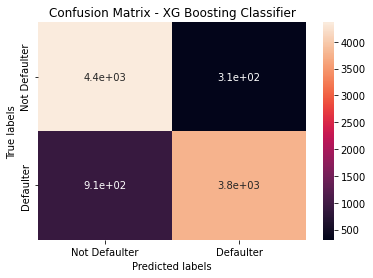

In [ ]:
# Get the confusion matrix for XG Boosting Classifier
cf_matrix(y_test,y_pred_xgbc,'XG Boosting Classifier')

###Cross Validation & Hyper parameter Tuning for XG Boosting

In [ ]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],'n_estimators' : [200, 250],'max_depth' : [15,20,25],'min_child_weight' : [1,3],'gamma': [0.3, 0.2, 0.1],'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Randomized search
xgb_grid = RandomizedSearchCV(estimator=xgb,param_distributions = param_dict,n_jobs=-1, n_iter=5, cv = 3,verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(gamma=0.2, max_depth=15, min_child_weight=3, min_samples_leaf=50,
              n_estimators=200)

In [ ]:
xgb_grid.best_params_

{'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 15,
 'min_child_weight': 3,
 'min_samples_leaf': 50,
 'n_estimators': 200}

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_xgbc_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgbc_grid=xgb_optimal_model.predict(X_train)

In [ ]:
evaluation_metrics(y_train_pred_xgbc_grid,y_train,y_pred_xgbc_grid,y_test)

The accuracy on train data is  0.995
The accuracy on test data is  0.883
The precision on test data is  0.838
The recall on test data is  0.92
The f1 on test data is  0.877
The roc_score on test data is  0.886


In [ ]:
# Get the confusion matrices for train and test
print("confusion_matrix for train:\n",confusion_matrix(y_train,y_train_pred_xgbc_grid))
print("\nconfusion_matrix for test:\n",confusion_matrix(y_test,y_pred_xgbc_grid))

confusion_matrix for train:
 [[18642    49]
 [  120 18571]]

confusion_matrix for test:
 [[4333  340]
 [ 757 3916]]


##Support Vector Machines

###Baseline

In [ ]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [ ]:
#fitting data into Support Vector Classifier
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [ ]:
#getting all scores for Support Vector Classifier
evaluation_metrics(y_train_pred_svm,y_train,y_pred_svm,y_test)

The accuracy on train data is  0.879
The accuracy on test data is  0.877
The precision on test data is  0.808
The recall on test data is  0.937
The f1 on test data is  0.868
The roc_score on test data is  0.885


[[4421  252]
 [ 895 3778]]


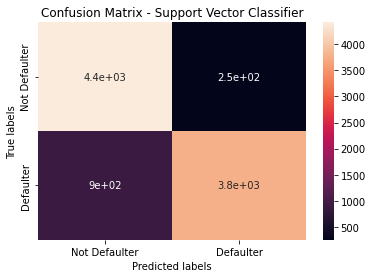

In [ ]:
cf_matrix(y_test,y_pred_svm,'Support Vector Classifier')

### Cross Validation & Hyperparameter tuning for Support Vector Machines

In [ ]:
# Hyperparameter
param_dict = {'C':[1, 10] ,'kernel': ['rbf','sigmoid']}

In [ ]:
# Creating an instance of the support vector classifier
svm=SVC(probability=True)

# Randomized search
from sklearn.model_selection import RandomizedSearchCV
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')

# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10],
                                        'kernel': ['rbf', 'sigmoid']},
                   scoring='roc_auc', verbose=2)

In [ ]:
svm_grid.best_estimator_

SVC(C=1, probability=True)

In [ ]:
svm_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
svm_optimal_model = svm_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

In [ ]:
evaluation_metrics(y_train_pred_svm_grid,y_train,y_pred_svm_grid,y_test)

The accuracy on train data is  0.879
The accuracy on test data is  0.877
The precision on test data is  0.808
The recall on test data is  0.937
The f1 on test data is  0.868
The roc_score on test data is  0.885


In [ ]:
# Get the confusion matrices for train and test
print("confusion_matrix for train:\n",confusion_matrix(y_train,y_train_pred_svm_grid))
print("\nconfusion_matrix for test:\n",confusion_matrix(y_test,y_pred_svm_grid))

confusion_matrix for train:
 [[17898   793]
 [ 3717 14974]]

confusion_matrix for test:
 [[4421  252]
 [ 895 3778]]


#**BaseLine Model Comparison Table**

In [ ]:
from prettytable import PrettyTable
baseline = PrettyTable(['SL NO.','Classifier',	'Train Accuracy',	'Test Accuracy',	'Precision',	'Recall',	'F1 Score',	'ROC Score'])
baseline.add_row(['1','Logistic Regression','0.875','0.875','0.802','0.938','0.865','0.883'])
baseline.add_row(['2','Decision Tree','0.999','0.812','0.836','0.798','0.817','0.813'])
baseline.add_row(['3','Random Forest','0.999','0.877','0.837','0.909','0.872','0.879'])
baseline.add_row(['4','Gradient Boost','0.87','0.868','0.801','0.924','0.859','0.875'])
baseline.add_row(['5','XG Boost','0.87','0.868','0.801','0.926','0.859','0.875'])
baseline.add_row(['5','Support Vector Machines','0.879','0.875','0.804','0.937','0.865','0.883'])
print(baseline)

+--------+-------------------------+----------------+---------------+-----------+--------+----------+-----------+
| SL NO. |        Classifier       | Train Accuracy | Test Accuracy | Precision | Recall | F1 Score | ROC Score |
+--------+-------------------------+----------------+---------------+-----------+--------+----------+-----------+
|   1    |   Logistic Regression   |     0.875      |     0.875     |   0.802   | 0.938  |  0.865   |   0.883   |
|   2    |      Decision Tree      |     0.999      |     0.812     |   0.836   | 0.798  |  0.817   |   0.813   |
|   3    |      Random Forest      |     0.999      |     0.877     |   0.837   | 0.909  |  0.872   |   0.879   |
|   4    |      Gradient Boost     |      0.87      |     0.868     |   0.801   | 0.924  |  0.859   |   0.875   |
|   5    |         XG Boost        |      0.87      |     0.868     |   0.801   | 0.926  |  0.859   |   0.875   |
|   5    | Support Vector Machines |     0.879      |     0.875     |   0.804   | 0.937 

##Combined ROC curve for all the models

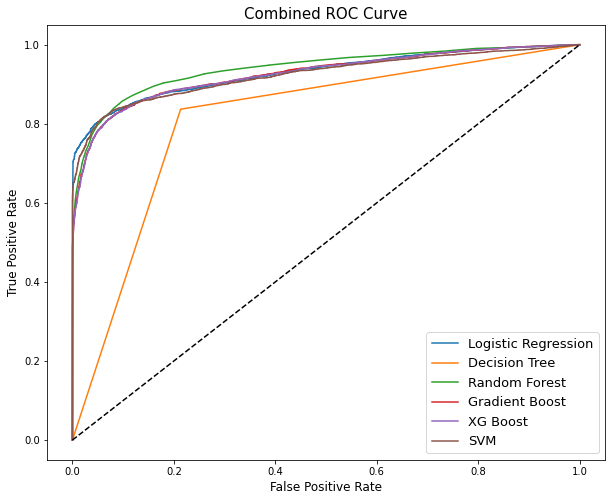

In [ ]:
#importing roc curve
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(10,8)) 

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  logis.predict_proba(X_test)[:,1])
fpr_dtc, tpr_dtc, _dtc    = roc_curve(y_test,  dtc.predict_proba(X_test)[:,1])
fpr_rfc, tpr_rfc, _rfc    = roc_curve(y_test,  rfc.predict_proba(X_test)[:,1])
fpr_gbc, tpr_gbc, _gbc    = roc_curve(y_test,  gbc.predict_proba(X_test)[:,1])
fpr_xgbc, tpr_xgbc, _xgbc = roc_curve(y_test,  xgbc.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, _svm    = roc_curve(y_test,  svm.predict_proba(X_test)[:,1])

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgbc, tpr_xgbc)
plt.plot(fpr_svm, tpr_svm)


plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boost", "XG Boost", "SVM"], prop={'size':13}, loc='lower right' )

#**Optimal Model Comparison Table**

In [ ]:
CV_hy = PrettyTable(['SL NO.','Classifier',	'Train Accuracy',	'Test Accuracy', 'Precision',	'Recall',	'F1 Score',	'ROC Score'])
CV_hy.add_row(['1','Logistic Regression','0.875','0.874','0.802','0.938','0.865','0.883'])
CV_hy.add_row(['2','Decision Tree','0.86','0.837','0.779','0.881','0.827','0.842'])
CV_hy.add_row(['2','Random Forest','0.856','0.85','0.808','0.881','0.843','0.852'])
CV_hy.add_row(['2','Gradient Boost','0.936','0.879','0.83','0.919','0.873','0.882'])
CV_hy.add_row(['2','XG Boost','0.992','0.881','0.835','0.919','0.875','0.884'])
CV_hy.add_row(['2','Support Vector Machine','0.879','0.875','0.804','0.937','0.865','0.883'])
print(CV_hy)

+--------+------------------------+----------------+---------------+-----------+--------+----------+-----------+
| SL NO. |       Classifier       | Train Accuracy | Test Accuracy | Precision | Recall | F1 Score | ROC Score |
+--------+------------------------+----------------+---------------+-----------+--------+----------+-----------+
|   1    |  Logistic Regression   |     0.875      |     0.874     |   0.802   | 0.938  |  0.865   |   0.883   |
|   2    |     Decision Tree      |      0.86      |     0.837     |   0.779   | 0.881  |  0.827   |   0.842   |
|   2    |     Random Forest      |     0.856      |      0.85     |   0.808   | 0.881  |  0.843   |   0.852   |
|   2    |     Gradient Boost     |     0.936      |     0.879     |    0.83   | 0.919  |  0.873   |   0.882   |
|   2    |        XG Boost        |     0.992      |     0.881     |   0.835   | 0.919  |  0.875   |   0.884   |
|   2    | Support Vector Machine |     0.879      |     0.875     |   0.804   | 0.937  |  0.865

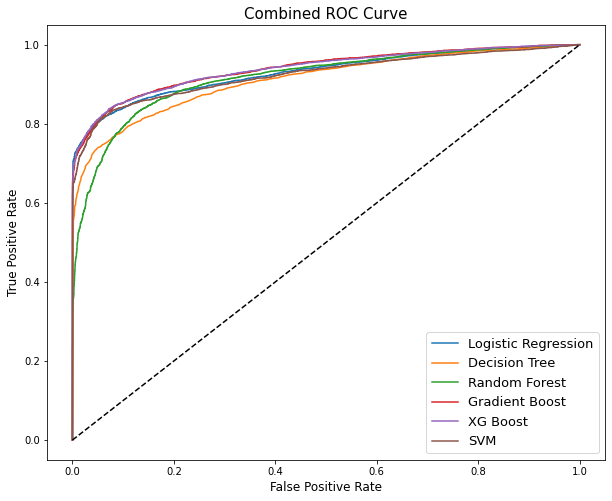

In [ ]:
#importing roc curve
from sklearn.metrics import roc_curve
fig = plt.figure(figsize=(10,8)) 

fpr_logi_grid, tpr_logi_grid, _logi_grid = roc_curve(y_test,  logi_grid.predict_proba(X_test)[:,1])
fpr_dtc_grid, tpr_dtc_grid, _dtc_grid    = roc_curve(y_test,  dtc_grid.predict_proba(X_test)[:,1])
fpr_rfc_grid, tpr_rfc_grid, _rfc_grid    = roc_curve(y_test,  rfc_grid.predict_proba(X_test)[:,1])
fpr_gbc_grid, tpr_gbc_grid, _gbc_grid    = roc_curve(y_test,  gbc_grid.predict_proba(X_test)[:,1])
fpr_xgb_grid, tpr_xgb_grid, _xgb_grid    = roc_curve(y_test,  xgb_grid.predict_proba(X_test)[:,1])
fpr_svm_grid, tpr_svm_grid, _svm_grid    = roc_curve(y_test,  svm_grid.predict_proba(X_test)[:,1])

plt.plot(fpr_logi_grid, tpr_logi_grid)
plt.plot(fpr_dtc_grid, tpr_dtc_grid)
plt.plot(fpr_rfc_grid, tpr_rfc_grid)
plt.plot(fpr_gbc_grid, tpr_gbc_grid)
plt.plot(fpr_xgb_grid, tpr_xgb_grid)
plt.plot(fpr_svm_grid, tpr_svm_grid)


plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boost", "XG Boost", "SVM"], prop={'size':13}, loc='lower right' )

#**Feature Importance On Random Forest Baseline Model**

In [ ]:
features = list(dataset_copy.drop('IsDefaulter',axis=1).describe(include='all').columns)

In [ ]:
feature_importances_rfc = rfc.feature_importances_

In [ ]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [ ]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

PAY_SEPT_0          0.069177
LIMIT_BAL           0.047272
BILL_AMT_SEPT       0.045870
AGE                 0.041003
PAY_AMT_AUG         0.038462
PAY_AMT_SEPT        0.038230
BILL_AMT_AUG        0.035972
BILL_AMT_JUL        0.034744
PAY_AMT_APR         0.033697
PAY_AMT_JUL         0.033254
PAY_AMT_JUN         0.032910
BILL_AMT_MAY        0.032339
BILL_AMT_JUN        0.031899
PAY_AMT_MAY         0.030709
MARRIAGE_married    0.030082
dtype: float64

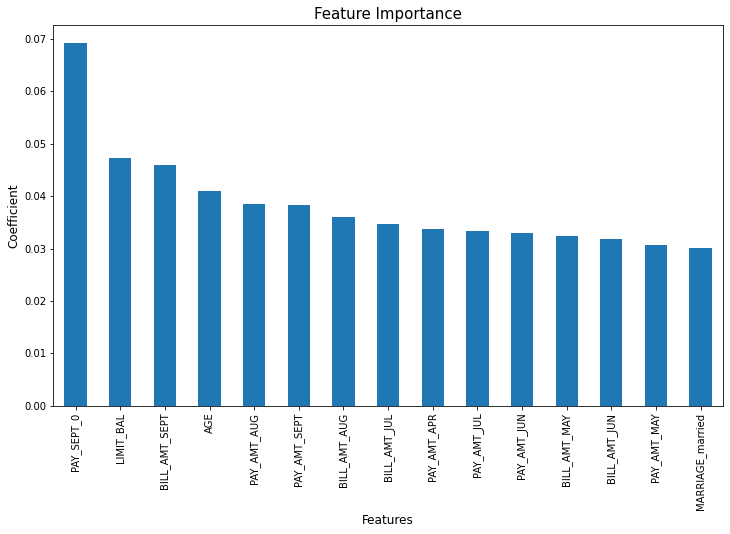

In [ ]:
fig = plt.figure(figsize=(12,7)) 
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

Above 15 features are the most important features of random forest classifier to classify thea data to Defaulter or Non Defaulter

#**Feature Importance On XG Boost Optimal Model**

In [ ]:
feature_importances_xgb_o = xgb_optimal_model.feature_importances_

In [ ]:
feature_importances_xgb_o_df = pd.Series(feature_importances_xgb_o, index=features)

In [ ]:
feature_importances_xgb_o_df.sort_values(ascending=False)[0:15]

PAY_SEPT_0               0.229792
PAY_SEPT_-2              0.156242
PAY_SEPT_-1              0.151593
PAY_SEPT_1               0.089101
PAY_AUG_-2               0.054316
MARRIAGE_others          0.028699
PAY_SEPT_2               0.026525
MARRIAGE_married         0.021039
EDUCATION_others         0.018753
EDUCATION_high school    0.015562
PAY_AUG_1                0.009898
PAY_SEPT_3               0.008904
PAY_JUN_-1               0.007668
PAY_AUG_4                0.006958
PAY_JUL_-2               0.006812
dtype: float32

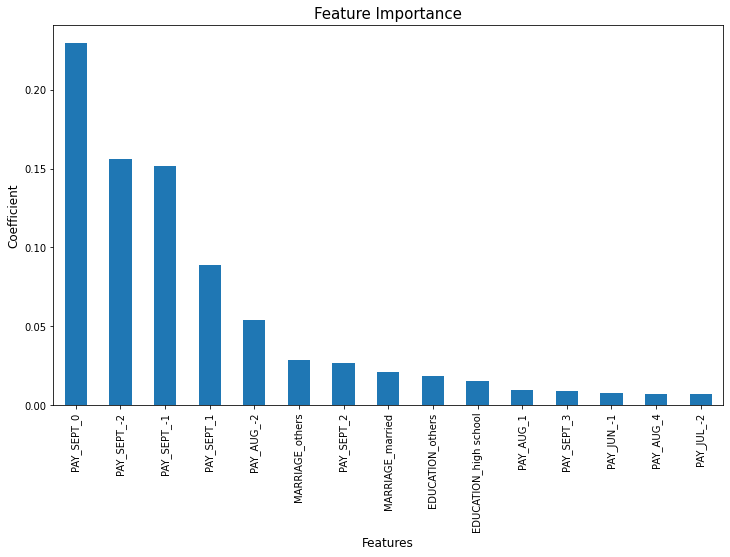

In [ ]:
fig = plt.figure(figsize=(12,7)) 
feature_importances_xgb_o_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

According to XG Boost .Above 15 features are the most important features in making the credit card default prediction

#**Conclusion**


* After Basic EDA,
 1. Limit amount was less for Credit Card Defaulters comparative to non defaulters.
 2. Dataset have more females credit card holder,so number of defaulter have high proportion of females.
 3. Credit Card No. of Defaulters as per education from top to bottom : 
University>graduate school>High School>Others
 4. Number of defaulters have a higher proportion of Singles.


* From all baseline models, Random Forest classifier shows highest test accuracy, F1 score and ROC score.

* Baseline model of Random forest and decision tree shows huge difference in train and test accuracy which shows overfitting.

* After cross validation and hyperparameter tuning, XG Boost shows highest test accuracy score of 88.10% and ROC Score is 0.884.
* Thus XG Boost with optimal model is best to predict the credit Card Default